In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
titanic_df = pd.read_csv('train.csv',sep=',')

In [4]:
titanic_df.head()

# sibsp = siblings on board. 1 for yes 0 for no
# parch = parents or child on board. 1 for yes 0 for no
# embarked = where they got on the ship

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


### some basic questions to answer

1) who were the passengers? (Age, class, gender, etc)
2) what deck were they on and how does that relate to their class?
3) where did the passengers come from?
4) who was alone and who was with family?

### broader question

1) what factors helped someone survive the sinking?

In [6]:
# question 1 --> who were the passengers on the titanic

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Keerthana\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### sns.factorplot() --> kind ='count'

C:\Users\Keerthana\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


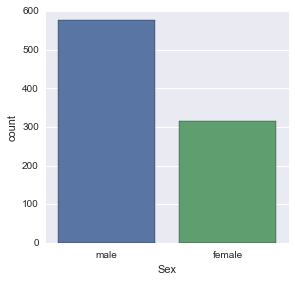

In [7]:
sns.factorplot('Sex',data=titanic_df,kind='count')

### further divide the plot on the basis of the class by using HUE option

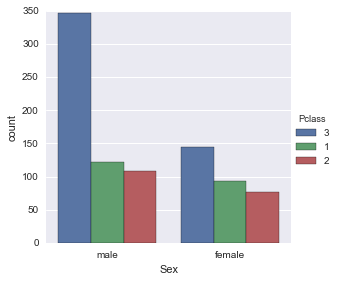

In [8]:
sns.factorplot('Sex',data=titanic_df,kind='count',hue='Pclass')

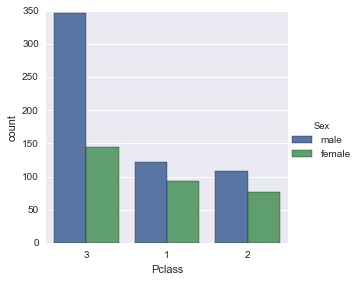

In [9]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Sex')

# A LOT of males in the 3rd class than females
# more or less same number in other classes

In [10]:
# lets separate into 'male', 'female' and 'children' going by the hypothesis - 'women and children first'

def male_female_child(passenger):
    age,sex=passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [11]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

# NOTE THE USAGE OF axis. According to the documentation - 

#axis : {0 or ‘index’, 1 or ‘columns’}, default 0
# 0 or ‘index’: apply function to each column
# 1 or ‘columns’: apply function to each row

# Since we have to apply function to the 2 columns in each row, we use axis = 1

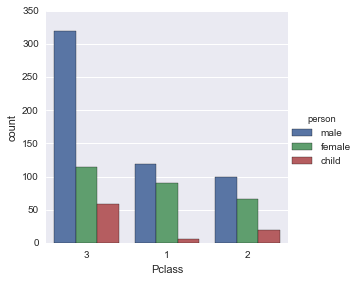

In [12]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person')

# here we see that there are the MOST children in the 3rd class and the least in the first class(which is sort of counter 
# intuitive)

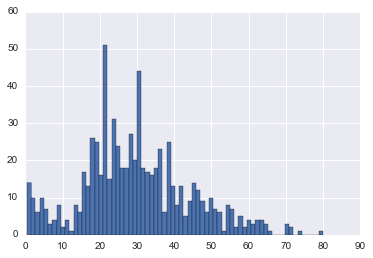

In [13]:
titanic_df['Age'].hist(bins=70)

In [14]:
titanic_df['Age'].mean()

29.69911764705882

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

### seaborn.FacetGrid() -->multiple plots on the SAME x-y axis 
#### this is different from plt.subplots() because that plots different graphs side by side or above-below each other

From the documentation

The basic workflow is to initialize the FacetGrid object with the dataset and the variables that are used to structure the grid. Then one or more plotting functions can be applied to each subset by calling FacetGrid.map() or FacetGrid.map_dataframe(). Finally, the plot can be tweaked with other methods to do things like change the axis labels, use different ticks, or add a legend. See the detailed code examples below for more information.

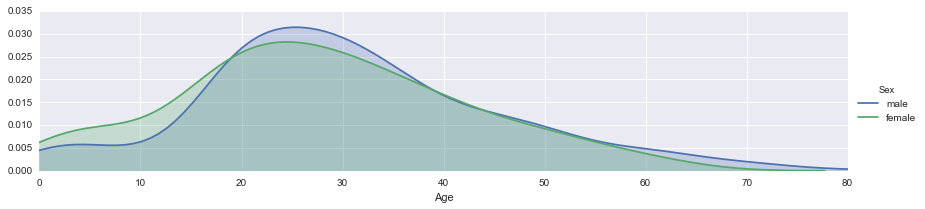

In [25]:
# initializing the FacetGrid
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

# giving the plotting function - KDE plot of the age and the hue of the age is already given above
fig.map(sns.kdeplot,'Age',shade=True)
# you only give the function, and the column name, since the dataset is already mentioned before in the facetgrid function

# maximum age on the dataset
oldest = titanic_df['Age'].max()

# one of the FacetGrid object functions. This is to set the x limits. You can also set the y-limits
fig.set(xlim=(0,oldest))

# Another function of the FacetGrid object. This adds the legends to the plot (the male, female guide on the right)
fig.add_legend() 

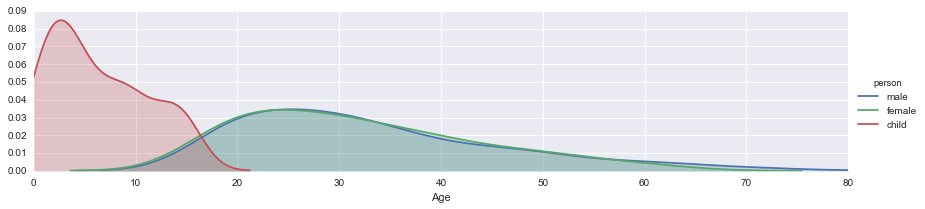

In [26]:
# now if you want to include the children as well in the plot

fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend() 

In [27]:
# note that in both the above plots, the children plot goes beyond 16 and the male-female plot goes below 16 because of the 
# bandwidth of the KDE plot

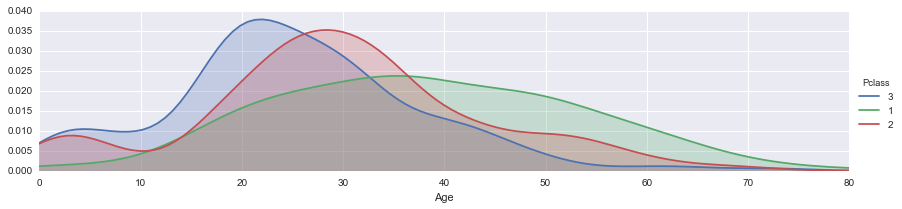

In [28]:
# now if you want to plot it by the class of the passenger

fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend() 

In [29]:
# question 2 -> what deck were they on and how does that relate to the Pclass?

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [30]:
deck = titanic_df['Cabin'].dropna()

In [31]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

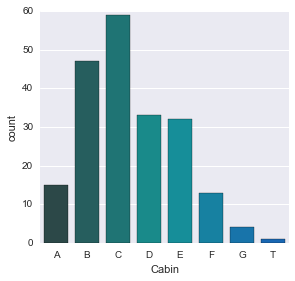

In [51]:
# now we only need the first letter to be able to find out the deck of the person 

levels = []
for level in deck:
    levels.append(level[0])
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.factorplot('Cabin',data=cabin_df.sort_values('Cabin'),palette='winter_d',kind='count')

# here i sorted the values in the data column to get a straight A - T without messing up the order
    

In [52]:
cabin_df=cabin_df[cabin_df.Cabin != 'T']

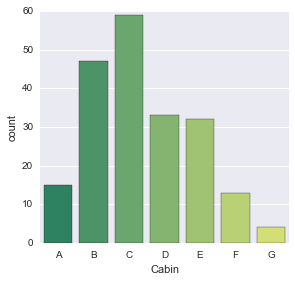

In [55]:
sns.factorplot('Cabin',data=cabin_df.sort_values('Cabin'),palette='summer',kind='count')

In [56]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


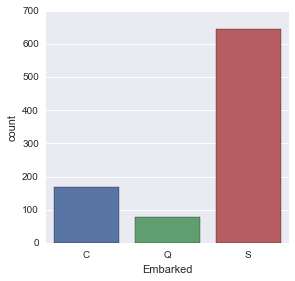

In [62]:
# 3 - where did the passengers come from?
# C = Cherbourg; Q = Queenstown; S = Southampton

sns.factorplot('Embarked',data=titanic_df,kind='count',x_order=['C','Q','S'])

# we can see here that most passengers entered from Southampton

C:\Users\Keerthana\Anaconda2\lib\site-packages\seaborn\categorical.py:2653: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


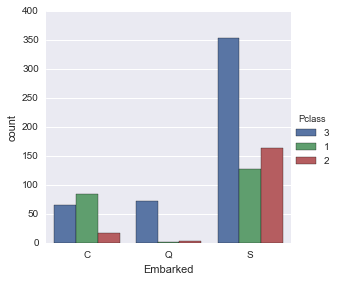

In [61]:
# we can add a hue here, of the class to get a better look

sns.factorplot('Embarked',data=titanic_df,kind='count',hue='Pclass',x_order=['C','Q','S'])


# important inferences from this data -
# 1) Almost all of the passengers entering from Queenstown are third class passengers (economics of queenstown?)
# 

In [63]:
# who was alone and who was with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [64]:
# sibsp = number of sibligs, and parch = number of parents/children, 

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

# if the value is zero, then they were all alone, for any value other than that, they had a family member aboard

In [65]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,0


In [68]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] ==0] = 'Alone'

C:\Users\Keerthana\Anaconda2\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [69]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


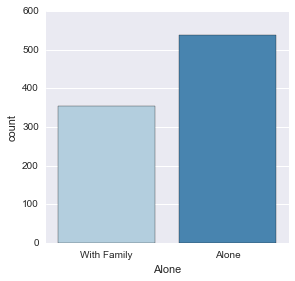

In [70]:
sns.factorplot('Alone',data=titanic_df,kind='count',palette='Blues')

# so more people were alone than people with family

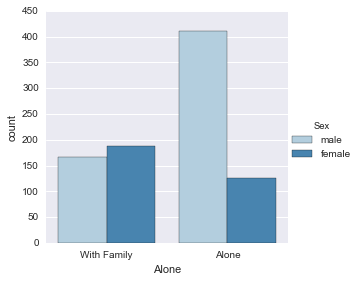

In [72]:
sns.factorplot('Alone',data=titanic_df,kind='count',palette='Blues',hue='Sex')

# so more men were alone than women

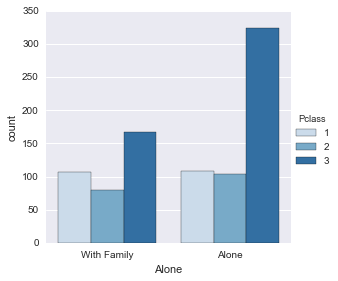

In [75]:
sns.factorplot('Alone',data=titanic_df,kind='count',palette='Blues',hue='Pclass',hue_order=[1,2,3])

# so the people who were alone were mostly from the third class (maybe travelling with friends)

In [76]:
# what factors help someone sink or survive??

titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

# just mapping the survived column to another interpreted value

In [77]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no


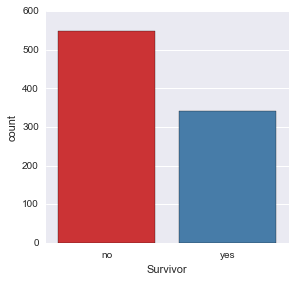

In [79]:
sns.factorplot('Survivor',data=titanic_df,kind='count',palette='Set1')

# so more people died than survived

In [87]:
# lets see which factors affected this

sns.factorplot('Pclass','Survived',data=titanic_df,x_order=[1,2,3])

# plot Pclass on the x-axis
# plot survived on the y-axis

# this shows that the survival rate of the 3rd class passengers is low

# this can also be corroborated by the fact that 3rd class passengers had the most males, so women and childern first would
# have left the men behind, and hence most 3rd class passengers got left behind


SyntaxError: invalid syntax (<ipython-input-87-34b29ec86de2>, line 3)

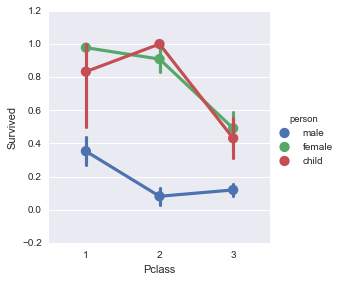

In [88]:
# lets tweak this a little bit, and add a person hue

sns.factorplot('Pclass','Survived',data=titanic_df,hue='person',x_order=[1,2,3])


In [89]:
# so we can see that the males have the lowest survival rate

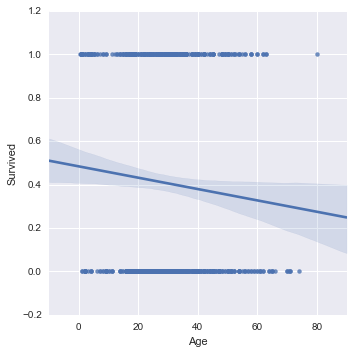

In [90]:
sns.lmplot('Age','Survived',data=titanic_df)

# We can conclude from the line, that older people didnt survive compare to the younger people

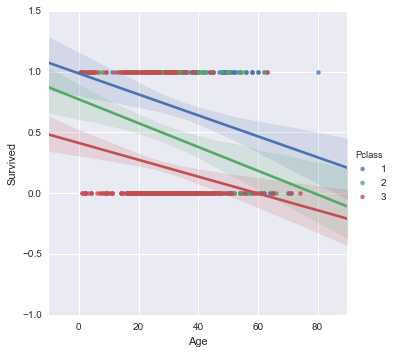

In [93]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',hue_order=[1,2,3])


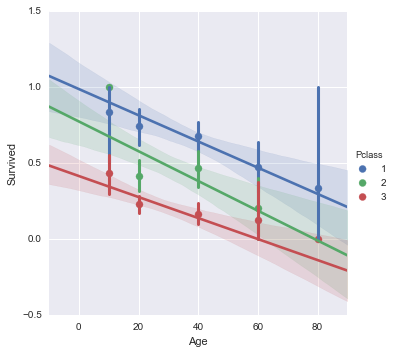

In [94]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',hue_order=[1,2,3],x_bins=generations)

In [95]:
# very high stdev on the older people in the first class


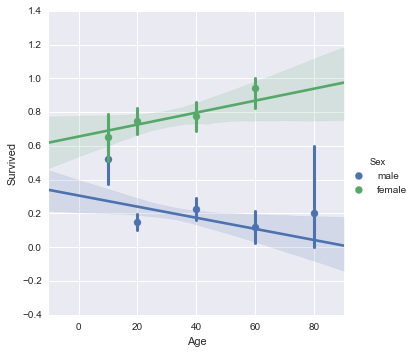

In [98]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex',x_bins=generations)

In [ ]:
# if you are an older female -> better chances of survival than an older male,
# still an older male has a very high standard deviation